In [1]:
# # install required packages for local workspace
# numpy already exists
# !pip install pandas
# !pip install seaborn

In [2]:
# import packages for analysing
import pandas as pd
import seaborn as sns
import numpy as np
import glob

In [3]:
# packages for plot
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# packages for chi sqaure test
from scipy.stats import chi2_contingency

The whole data are provided in form of `*.wdb`(database files for Microsoft Access) file and exported to csv tables.

In [5]:
fileNumber = 0
# import pandas before running these codes:
fileInfoList = pd.DataFrame(columns = ["fileName", "rows","columns"])
for file in glob.glob("*.csv"):
    tempCsv = pd.read_csv(file)
    fileInfoList.loc[fileNumber] = [file, tempCsv.shape[0], tempCsv.shape[1]]
    fileNumber += 1
# # write the file infomation into csv
# fileInfoList.to_csv("fileInfoList.csv",index=False,sep=',')

# # read file information from fileInfoList if part of the csv files are provided.
# fileInfoList = pandas.read_csv("fileInfoList.csv")

print(fileInfoList)
print(fileNumber)

                       fileName  rows columns
0                WDB_Person.csv  2355      16
1        WDB_ReligiousMotif.csv   128       9
2                WDB_Ordeal.csv   134      12
3      WDB_MentionedAsWitch.csv  1258      19
4            WDB_WhiteMagic.csv    85       9
5             WDB_Reference.csv  4921      34
6     WDB_MusicalInstrument.csv    51      10
7           WDB_LinkedTrial.csv  5476       6
8            WDB_Ref_Parish.csv  1288      19
9        WDB_CalendarCustom.csv   142       9
10         WDB_Denunciation.csv    72      12
11         WDB_Trial_Person.csv   641      12
12          WDB_Case_person.csv  9791      11
13           WDB_Commission.csv  1603      15
14       WDB_Accused_family.csv   951      19
15         WDB_RitualObject.csv   632       9
16                WDB_Trial.csv  3211      65
17              WDB_Torture.csv   110      12
18           WDB_MovestoHLA.csv   276      12
19      WDB_DevilAppearance.csv   396      10
20                 timeLine.csv  3

There are 38 csv files in different shapes.

(file "fileInfoList.csv" "timeLine" are created during analyzing)

# Case

**Case** refers to a witchcraft accusation of one individual witch.

**Case** consists of:
 - The begining: initial denunciation or supposed denunciation.
 - Middle: investigation, arrest and trial of an accused witch.
 - End: dropped charges, a verdict of inocence or execution.
 
Load the data.

In [6]:
case = pd.read_csv("WDB_Case.csv")
case.head()

,CaseRef,CaseId,CaseSystemId,NamedIndividual,AccusedRef,CaseStart_date,CaseStart_date_as_date,Case_date,Case_date_as_date,Age_at_case,...,ClaimedPossessed,AdmitLesserCharge,ClaimedNaturalCauses,Nodefence,DefenseNotes,CaseNotes,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,C/EGD/10,10,EGD,0.0,NaN,2/8/1649,"02/08/1649, 00:00:00",2/8/1649,"02/08/1649, 00:00:00",NaN,...,0,0,0,0,NaN,certain persons from Haymouth.,SMD,"15/05/2001, 17:00:16",jhm,"30/07/2002, 15:32:43"
1,C/EGD/100,100,EGD,-1.0,A/EGD/89,27/1/1591,"27/01/1591, 00:00:00",8/5/1591,"08/05/1591, 00:00:00",NaN,...,0,0,0,0,NaN,NaN,SMD,"15/05/2001, 17:00:16",jhm,"10/10/2002, 14:51:54"
2,C/EGD/1000,1000,EGD,-1.0,A/EGD/989,6/5/1627,"06/05/1627, 00:00:00",6/5/1627,"06/05/1627, 00:00:00",NaN,...,0,0,0,0,NaN,NaN,SMD,"15/05/2001, 17:00:16",jhm,"09/10/2002, 15:52:09"
3,C/EGD/1001,1001,EGD,-1.0,A/EGD/990,NaN,NaN,25/4/1627,"25/04/1627, 00:00:00",NaN,...,0,0,0,0,NaN,NaN,SMD,"15/05/2001, 17:00:16",jhm,"18/09/2002, 15:23:08"
4,C/EGD/1002,1002,EGD,-1.0,A/EGD/991,NaN,NaN,3/5/1627,"03/05/1627, 00:00:00",NaN,...,0,0,0,0,NaN,NaN,SMD,"15/05/2001, 17:00:16",jhm,"13/11/2002, 13:59:41"


In [7]:
case.shape

(3413, 111)

In [8]:
case.dtypes

CaseRef                    object
CaseId                      int64
CaseSystemId               object
NamedIndividual           float64
AccusedRef                 object
CaseStart_date             object
CaseStart_date_as_date     object
Case_date                  object
Case_date_as_date          object
Age_at_case               float64
CaseCommonName             object
Commission                 object
Complaint                  object
Correspondence             object
Chronicle                 float64
Other                      object
Suspects_text             float64
UNorthodoxRelPract_p        int64
UNorthodoxRelPract_s        int64
Consulting_p                int64
Consulting_s                int64
Demonic_p                   int64
Demonic_s                   int64
Demonic_possess_p           int64
Demonic_possess_s           int64
Fairies_p                   int64
Fairies_s                   int64
Folk_healing_p              int64
Folk_healing_s              int64
Maleficium_p  

In [9]:
type(case['AccusedRef'][5])

str

note: Here `object` refers `string`.But sometimes `object` means numpy.float or some other types of data.

In [10]:
case.count()

CaseRef                   3413
CaseId                    3413
CaseSystemId              3413
NamedIndividual           3411
AccusedRef                3212
CaseStart_date            2627
CaseStart_date_as_date    2627
Case_date                 3399
Case_date_as_date         3398
Age_at_case                164
CaseCommonName            3413
Commission                  46
Complaint                    3
Correspondence              20
Chronicle                    0
Other                       46
Suspects_text             1114
UNorthodoxRelPract_p      3413
UNorthodoxRelPract_s      3413
Consulting_p              3413
Consulting_s              3413
Demonic_p                 3413
Demonic_s                 3413
Demonic_possess_p         3413
Demonic_possess_s         3413
Fairies_p                 3413
Fairies_s                 3413
Folk_healing_p            3413
Folk_healing_s            3413
Maleficium_p              3413
                          ... 
AnimalDeath               3413
FemaleIn

In the data with 3413 rows, some are horribly missing such as columns `Age_at_case`, `Commission`, `Complaint`...

note: The blank fields mean `unknown`.

## I. Dates and duration

In the first part, my focus is `CaseStart_date` and `Case_date`(means the end date) and caculating the duration to see how long each case lasted.

In [11]:
timeLine = case.loc[:, ("CaseRef","CaseStart_date", "Case_date")].copy()
print(timeLine.head())

      CaseRef CaseStart_date  Case_date
0    C/EGD/10       2/8/1649   2/8/1649
1   C/EGD/100      27/1/1591   8/5/1591
2  C/EGD/1000       6/5/1627   6/5/1627
3  C/EGD/1001            NaN  25/4/1627
4  C/EGD/1002            NaN   3/5/1627


Caculate the duration of case, and add to the timeLine dateframe.

In [12]:
rowsNumber = timeLine.shape[0]

# considering NAN, add some bool series to mark which row are NAN
timeLine["recorded_start"] = ~ timeLine["CaseStart_date"].isnull()
timeLine["recorded_end"] = ~ timeLine["Case_date"].isnull()
timeLine["recorded_duration"] = timeLine["recorded_start"] & timeLine["recorded_end"]

# show the number of valid timelines
np.sum(timeLine["recorded_duration"])

2627

There are 4 formats in the dates:
 - "30/11/2017"
 - "11/2017" 
 - "2017"
 - NAN
 
NAN was addressed by bool marks.

The other 3 formats are addressed through following functions:
 - Transfer date string to days or months numbers
 - Caculate the duration between two different dates
 - Get the year when the case happened

In [13]:
# function to transfer the int date list to days or months so we can caculate dates by days or months
def timeCacu(dateList, mode):
    if(mode == "days"):
        uni = [365, 30, 1]
    elif(mode == "months"):
        uni = [12, 1, 1/30]
    else:
        return(0)
    timeSum = 0
    j = 0
    dateList.reverse()
    for i in dateList:
        timeSum += i * uni[j]
        j += 1
#     Dealing with format like "30/11/2017", "11/2017", "2017"
#     "11/2017" is treated as "01/11/2017"; "2017" is treated as "01/06/2017"
#     uni[0], uni[1], uni[2] represent year, month, day
    if(j == 1):
        timeSum += uni[1] * 6 + uni[2] * 1
    if(j == 2):
        timeSum += uni[2] * 1
        
    return(timeSum)
        
# function to caculate the days or months between two dates
def dateCacu(date1, date2, mode):
    dateList1 = list(map(int, date1.split("/")))
    dateList2 = list(map(int, date2.split("/")))
    if(date1 == date2):
        return(1)
    duration = timeCacu(dateList2, mode) - timeCacu(dateList1, mode)
    return(duration)

# function to get the year from the string date
def getYear(date):
    date = list(map(int, date.split("/")))
    date.reverse()
    return(date[0])

In [14]:
# Test the function
dateCacu("6/5/2017", "3/2/2019", "months")

20.899999999997817

In [15]:
getYear("6/5/2017")

2017

Use these functions to address our dates:

In [16]:
# New columns
timeLine["duration"] = 1
timeLine["year"] = 1

for i in range(rowsNumber):
    startDate = timeLine["CaseStart_date"][i]
    endDate = timeLine["Case_date"][i]
    if(timeLine["recorded_duration"][i]):
        # caculate the duration
        duration = dateCacu(startDate, endDate, "days")
        year = getYear(startDate)
    elif(timeLine["recorded_end"][i]):
        year = getYear(endDate)
        duration = 1
    else:
        year = np.nan
        duration = 1
    # In case new columns inserted, extract index from data.
    durationIndex = timeLine.columns.tolist().index("duration")
    yearIndex = timeLine.columns.tolist().index("year")
    timeLine.iloc[i, durationIndex] = duration
    timeLine.iloc[i, yearIndex] = year

In [17]:
# mark the rows that the year was successfully caculated
timeLine["valid_year"] = ~ timeLine["year"].isnull()

In [18]:
timeLine.head()

,CaseRef,CaseStart_date,Case_date,recorded_start,recorded_end,recorded_duration,duration,year,valid_year
0,C/EGD/10,2/8/1649,2/8/1649,True,True,True,1,1649.0,True
1,C/EGD/100,27/1/1591,8/5/1591,True,True,True,101,1591.0,True
2,C/EGD/1000,6/5/1627,6/5/1627,True,True,True,1,1627.0,True
3,C/EGD/1001,NaN,25/4/1627,False,True,False,1,1627.0,True
4,C/EGD/1002,NaN,3/5/1627,False,True,False,1,1627.0,True


In [19]:
timeLine.describe()

,duration,year
count,3413.000000,3399.000000
mean,170.425432,1643.415122
std,1600.638510,28.938536
min,-36161.000000,1507.000000
25%,1.000000,1629.000000
50%,1.000000,1649.000000
75%,15.000000,1661.000000
max,36500.000000,1727.000000


From the column `year`, it could be told that the recorded cases happened during 1507 ~ 1727.

This general view in description also suggests that there are some **wierd things** about the start and end date: 
 - Some end dates are ahead of start dates.

To avoid this issue in the following analysis, add a new column to mark if the duration is valid. I choose not to use these data and also not delete the rows in case these rows may be used for other purposes.

In [20]:
# add a new column
# mark the duration is valid
timeLine["valid_dur"] = timeLine["recorded_duration"] & (timeLine["duration"] > 0)

In [21]:
# save this useful dataframe
# timeLine.to_csv("timeLine.csv")

In [22]:
timeLine.head()

,CaseRef,CaseStart_date,Case_date,recorded_start,recorded_end,recorded_duration,duration,year,valid_year,valid_dur
0,C/EGD/10,2/8/1649,2/8/1649,True,True,True,1,1649.0,True,True
1,C/EGD/100,27/1/1591,8/5/1591,True,True,True,101,1591.0,True,True
2,C/EGD/1000,6/5/1627,6/5/1627,True,True,True,1,1627.0,True,True
3,C/EGD/1001,NaN,25/4/1627,False,True,False,1,1627.0,True,False
4,C/EGD/1002,NaN,3/5/1627,False,True,False,1,1627.0,True,False


Here, a `timeLine.csv` file is created to record the durations.

A series of bool vector `recorded_start`, `recorded_end`, `recorded_duration`, `valid_dur` indicating the reliability of the `duration` and can be used as index vector to extract required duration time.

Based on this dataframe:

1. When did most cases happened?

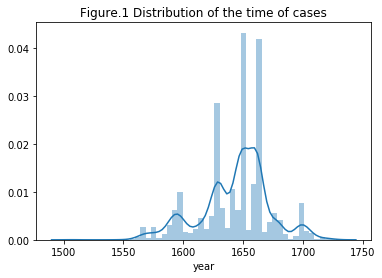

In [70]:
case_years = timeLine.loc[(timeLine["valid_year"], "year")]
chart = sns.distplot(case_years)
chart.set_title("Figure.1 Distribution of the time of cases")
plt.show()

In [71]:
case_years.value_counts().iloc[0:6]

1649.0    440
1662.0    375
1661.0    245
1629.0    192
1650.0    186
1643.0    129
Name: year, dtype: int64

According to the distribution plot and value counts, during 1507 ~ 1727, there are five peak years when most cases happened: 1649, 1662, 1661, 1629, 1650.

Most of the cases happened around 1649 ~ 1662.

 2. How long did the longest case last?

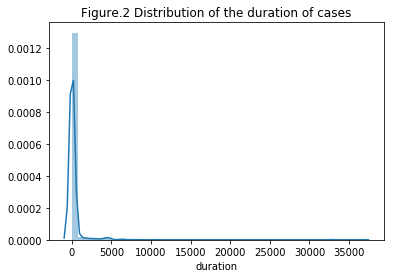

In [72]:
# plot the distribution to see the pattern of the duration of cases.
valid_timeLine = timeLine.loc[(timeLine["valid_dur"], "duration")]
chart = sns.distplot(valid_timeLine)
chart.set_title("Figure.2 Distribution of the duration of cases")
plt.show()

#note: sometims there is a futureWarning about index

In [73]:
valid_timeLine.describe()

count     2606.000000
mean       251.566002
std       1552.039759
min          1.000000
25%          1.000000
50%          1.000000
75%         46.750000
max      36500.000000
Name: duration, dtype: float64

As a result, the longest case lasted for 10 years.

Most 1-day durations could be accounted to that the end date is the same as the start date in the database.

## II. Characterisation

Part II analyzes the characterisation.

**Characterisation** is the feature of case. There are 2 types of characterisation:
 - Primary characterisation: the research team decided this was the main theme.
 - Secondary characterisation: the team found this mentioned in the documentation.
 
Extract the relevant data:

In [74]:
characterisation = case.loc[:, "UNorthodoxRelPract_p":"WhiteMagic_s"]

In [75]:
# drop the notes column
characterisation = characterisation.drop(columns = ["OtherText"])

In [76]:
characterisation.shape

(3413, 34)

In [77]:
np.sum(characterisation)

UNorthodoxRelPract_p        0
UNorthodoxRelPract_s       85
Consulting_p               11
Consulting_s               46
Demonic_p                  49
Demonic_s                 528
Demonic_possess_p          56
Demonic_possess_s          79
Fairies_p                   9
Fairies_s                 113
Folk_healing_p             40
Folk_healing_s            141
Maleficium_p               40
Maleficium_s              414
Midwifery_p                 0
Midwifery_s                10
ImplicatedByAnother_p      32
ImplicatedByAnother_s     948
Neighbhd_dispute_p         49
Neighbhd_dispute_s        120
PoliticalMotive_p           3
PoliticalMotive_s          52
PropertyMotive_p            3
PropertyMotive_s           62
RefusedCharity_p            9
RefusedCharity_s           19
Treason_p                   3
Treason_s                  19
Other_p                    14
Other_s                    23
NotEnoughInfo_p          3070
NotEnoughInfo_s          3113
WhiteMagic_p                5
WhiteMagic

In [78]:
characterisationNotEnoughInfo = characterisation.loc[:, "NotEnoughInfo_p":"NotEnoughInfo_s"]
# then drop the two columns to better illustrate the info that is recorded
characterisation = characterisation.drop(columns = ["NotEnoughInfo_p", "NotEnoughInfo_s"])

In [79]:
# separate the primary characterisation and the secondary charaterisation of cases
p = range(characterisation.shape[1])[::2]
s = range(characterisation.shape[1])[1::2]
characterisationPrimary = characterisation.iloc[:, p]
characterisationSecondary = characterisation.iloc[:, s]

Based on these two dataframes:

 1. Illustrate the pattern of the main themes.

In [80]:
primaryChaDist = np.sum(characterisationPrimary)
primaryChaDist = pd.DataFrame(primaryChaDist)
primaryChaDist

,0
UNorthodoxRelPract_p,0
Consulting_p,11
Demonic_p,49
Demonic_possess_p,56
Fairies_p,9
Folk_healing_p,40
Maleficium_p,40
Midwifery_p,0
ImplicatedByAnother_p,32
Neighbhd_dispute_p,49


In [81]:
# to render the names cleaner, delete _p
# note: this may not be a good choice for the latter matrix with rows of pimary and columns of secondary
cha_Names = list()
for name in primaryChaDist.index:
    name = name.replace("_p", "")
    cha_Names.append(name)
primaryChaDist.index = cha_Names

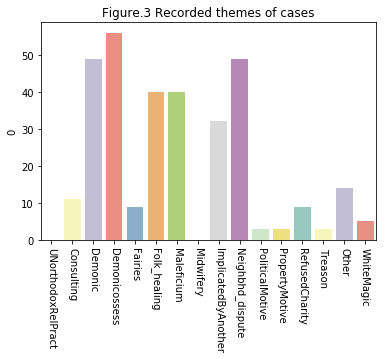

In [82]:
chart = sns.barplot(x = primaryChaDist.index, y = primaryChaDist.loc[:,0], palette = 'Set3')
chart.set_xticklabels(chart.get_xticklabels(), rotation = -90)
chart.set_title("Figure.3 Recorded themes of cases")
plt.show()

The most popular themes in witchcraft cases are: Demonicossess, Demonic and Neighbhd_dispute.

For the features mentioned in the case:

In [83]:
secondaryChaDist = pd.DataFrame(np.sum(characterisationSecondary))
secondaryChaDist

,0
UNorthodoxRelPract_s,85
Consulting_s,46
Demonic_s,528
Demonic_possess_s,79
Fairies_s,113
Folk_healing_s,141
Maleficium_s,414
Midwifery_s,10
ImplicatedByAnother_s,948
Neighbhd_dispute_s,120


In [84]:
# same to _s
cha_Names = list()
for name in secondaryChaDist.index:
    name = name.replace("_s", "")
    cha_Names.append(name)
secondaryChaDist.index = cha_Names

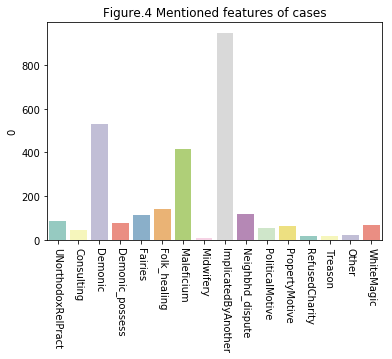

In [85]:
chart = sns.barplot(x = secondaryChaDist.index, y = secondaryChaDist.loc[:,0], palette = 'Set3')
chart.set_xticklabels(chart.get_xticklabels(), rotation = -90)
chart.set_title("Figure.4 Mentioned features of cases")
plt.show()

The pattern of mentioned features is different from the pattern of themes. The most popular features mentioned are: `Implicated by another(named as accomplice)`, `Demonic` and `Maleficium`.

2. Explore the relations between main themes and mentioned features.

To test whether two categorical variables is related, I apply chi-square test on contingency tables.

Prepare the function for chi-square test:

In [86]:
# from scipy.stats import chi2_contingency
# function to caculate two arrays into a contingency table and do chi_square test.
def chiContingencyTest(array1, array2):
#     array1 and array 2 should be pd or np series. py list do not work.
    x = array1 == 1
    y = array2 == 1
    a = np.sum(x & y)
    b = np.sum(x & ~y)
    c = np.sum(~x & y)
    d = np.sum(~x & ~y)
    chi_table = np.array([[a, b],[c, d]])
    return(chi2_contingency(chi_table))

Test the chiContingencyTest function, showing that two random arrays will get a p-value > 0.1, which means they are significantly related.

In [87]:
x =np.random.rand(3000)
x = x - 0.95

In [88]:
y = np.random.rand(3000)
y = y - 0.98

In [89]:
x = x > 0

In [90]:
y = y > 0

In [91]:
chiContingencyTest(x, y)[1]

0.7204785524980035

Related arrays will get a p-value near 0, meaning they are affecting each other.

In [92]:
chiContingencyTest(x, ~ x)[1]

0.0

To illustrate the relations among these characterisations. I plan to draw a heatmap. The first step is to create a dataframe storing the indicators for the heatmap.

In [93]:
# build a dataframe to record the indicators
primaryCorSecondary = pd.DataFrame(index = primaryChaDist.index, columns = secondaryChaDist.index)

In [94]:
for i in range(characterisationPrimary.shape[1]):
    for j in range(characterisationSecondary.shape[1]):
        try:
            primaryCorSecondary.iloc[i, j] = chiContingencyTest(characterisationPrimary.iloc[:, i], characterisationSecondary.iloc[:, j])[1]
        except:
            print("An error occurred. The point is:", i, j)
            primaryCorSecondary.iloc[i, j] = 1

An error occurred. The point is: 0 0
An error occurred. The point is: 0 1
An error occurred. The point is: 0 2
An error occurred. The point is: 0 3
An error occurred. The point is: 0 4
An error occurred. The point is: 0 5
An error occurred. The point is: 0 6
An error occurred. The point is: 0 7
An error occurred. The point is: 0 8
An error occurred. The point is: 0 9
An error occurred. The point is: 0 10
An error occurred. The point is: 0 11
An error occurred. The point is: 0 12
An error occurred. The point is: 0 13
An error occurred. The point is: 0 14
An error occurred. The point is: 0 15
An error occurred. The point is: 7 0
An error occurred. The point is: 7 1
An error occurred. The point is: 7 2
An error occurred. The point is: 7 3
An error occurred. The point is: 7 4
An error occurred. The point is: 7 5
An error occurred. The point is: 7 6
An error occurred. The point is: 7 7
An error occurred. The point is: 7 8
An error occurred. The point is: 7 9
An error occurred. The point is:

These errors occurred because all the values in `UNorthodoxRelPract_p` and `Midwifery_p` are FALSE(ZERO).

Assume their p-value is 1.0 in these fields so that they are not related to any other variables.

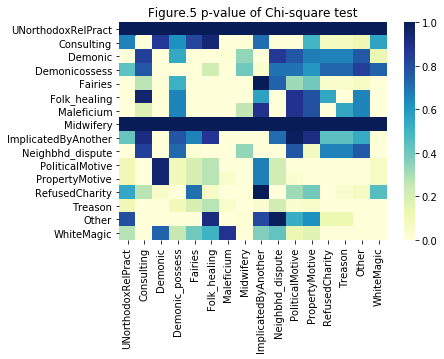

In [95]:
# the seanborn.heatmap cannot handle none, so fill the none first.
primaryCorSecondary.fillna(value=np.nan, inplace=True)
chart = sns.heatmap(primaryCorSecondary, cmap="YlGnBu")
chart.set_title("Figure.5 p-value of Chi-square test")
plt.show()

The colour spectrum represent the value of chi-square test p-value. Yellow means that the theme(in rows) are related with the feature(in columns).

Furthermore, compare the p-value with 0.05 to address the significance. 

In [96]:
# modify the function.
# return an indicator that is able to show the "positive" or "negative" relation.
def chiContingencyTest_2(array1, array2):
#     array1 and array 2 should be pd or np series. py list do not work.
    x = array1 == 1
    y = array2 == 1
    a = np.sum(x & y)
    b = np.sum(x & ~y)
    c = np.sum(~x & y)
    d = np.sum(~x & ~y)
    chi_table = np.array([[a, b],[c, d]])
    try:
        pValue = chi2_contingency(chi_table)[1]
    except:
        pValue = 1.0
    return(pValue > 0.05)

In [97]:
# build a dataframe to record the indicators
primaryCorSecondary_2 = pd.DataFrame(index = primaryChaDist.index, columns = secondaryChaDist.index)

In [98]:
for i in range(characterisationPrimary.shape[1]):
    for j in range(characterisationSecondary.shape[1]):
        primaryCorSecondary_2.iloc[i, j] = chiContingencyTest_2(characterisationPrimary.iloc[:, i], characterisationSecondary.iloc[:, j])

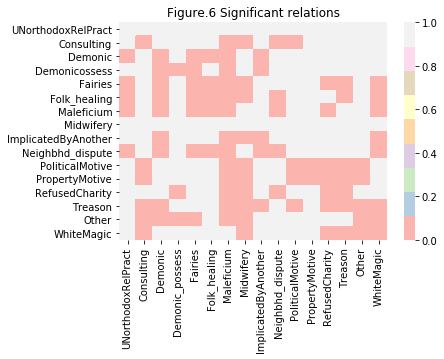

In [99]:
# the seanborn.heatmap cannot handle none, so fill the none first.
primaryCorSecondary_2.fillna(value=np.nan, inplace=True)
chart = sns.heatmap(primaryCorSecondary_2, cmap = "Pastel1")
chart.set_title("Figure.6 Significant relations")
plt.show()

Now, the result can be better interpreted.

The colour Pink means that the theme are related with the feature significantly.

For example:

In [100]:
# change the theme here if you want to explore another theme
# options:'UNorthodoxRelPract', 'Consulting', 'Demonic', 'Demonic_possess',
#        'Fairies', 'Folk_healing', 'Maleficium', 'Midwifery',
#        'ImplicatedByAnother', 'Neighbhd_dispute', 'PoliticalMotive',
#        'PropertyMotive', 'RefusedCharity', 'Treason', 'Other', 'WhiteMagic'
theme = "Fairies"

relatedNames = primaryCorSecondary_2.columns[ ~ primaryCorSecondary_2.loc[theme]]
print("The theme \""+ theme + "\" is significantly related with:")
string = ""
for name in relatedNames:
    if(name != theme):
        string += name + ", "
print(string[0:-2] + ".")

The theme "Fairies" is significantly related with:
UNorthodoxRelPract, Demonic, Folk_healing, Maleficium, Midwifery, RefusedCharity, Treason, WhiteMagic.


However, it could not be inferred from chi-sqaure test whether they are "positively" related or "negatively" related.

Another idea is to explore which features are more likely to appear in each theme.

The method is to count the relative frequencies of features mentioned in different themes.

In [101]:
# build a dataframe to record the indicators
primaryCorSecondary_3 = pd.DataFrame(index = primaryChaDist.index, columns = secondaryChaDist.index)

In [102]:
# modify the function to return the relative frequencies
def chiContingencyTest_3(array1, array2):
#     array1 and array 2 should be pd or np series. py list do not work.
    x = array1 == 1
    y = array2 == 1
    a = np.sum(x & y)
#     changing x to y tells that a feature is more likely to distribute in which theme.
    b = np.sum(x)
    if(b == 0):
        return(0)
    else:
        return(a / b)

In [103]:
for i in range(characterisationPrimary.shape[1]):
    for j in range(characterisationSecondary.shape[1]):
        primaryCorSecondary_3.iloc[i, j] = chiContingencyTest_3(characterisationPrimary.iloc[:, i], characterisationSecondary.iloc[:, j])

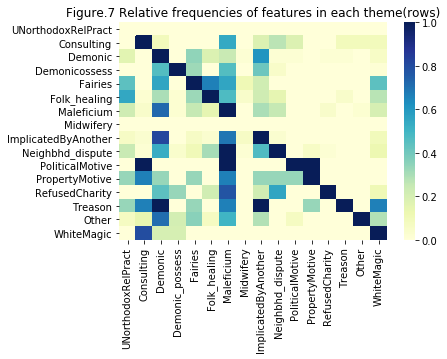

In [104]:
# the seanborn.heatmap cannot handle none, so fill the none first.
primaryCorSecondary_3.fillna(value=np.nan, inplace=True)
chart = sns.heatmap(primaryCorSecondary_3, cmap="YlGnBu")
chart.set_title("Figure.7 Relative frequencies of features in each theme(rows)")
plt.show()

Figure.7 presents some similar patterns as the Figure.6 but more detailed.

In [105]:
# change the theme and threshold here if you want to explore another theme
# options:'UNorthodoxRelPract'(Unorthodox religious practice ), 'Consulting', 'Demonic', 'Demonic_possess',
#        'Fairies', 'Folk_healing', 'Maleficium', 'Midwifery',
#        'ImplicatedByAnother', 'Neighbhd_dispute', 'PoliticalMotive',
#        'PropertyMotive', 'RefusedCharity', 'Treason', 'Other', 'WhiteMagic'
theme = "Fairies"
threshold = 0.4

# note: this works when the rows and columns are symmatrical
mentionedNames = primaryCorSecondary_3.columns[primaryCorSecondary_3.loc[theme] > threshold]
print("In the theme \""+ theme + "\":")
string = ""
for name in mentionedNames:
    if(name != theme):
        string += name + ", "
print(string[0:-2] + " " + "are/is more likely to be mentioned")

In the theme "Fairies":
UNorthodoxRelPract, Demonic, Folk_healing, Maleficium, WhiteMagic are/is more likely to be mentioned


In [106]:
# note: wrap it to a function?

In [107]:
def explore_characterisation(theme, threshold):
    mentionedNames = primaryCorSecondary_3.columns[primaryCorSecondary_3.loc[theme] > threshold]
    string = "In the theme \""+ theme + "\": "
    for name in mentionedNames:
        if(name != theme):
            string += name + ", "
    string = string[0:-2] + " " + "are/is more likely to be mentioned."
    return(string)

In [108]:
explore_characterisation("Fairies", 0.4)

'In the theme "Fairies": UNorthodoxRelPract, Demonic, Folk_healing, Maleficium, WhiteMagic are/is more likely to be mentioned.'

Comparing Figure.6 and Figure.7, I think Figure.7 is more meaningful because it tells what features are more likely to be mentioned in a theme.
The way drawing Figure.7 will be reused in the analysis in part III.

## III. Disease or Damage
Part III is focusing on disease and damage.

Load the data:

In [109]:
diseaseOrDamage = case.loc[:, "HumanIllness":"WeatherModification"].copy()

In [110]:
diseaseOrDamage = diseaseOrDamage.drop(columns = "DiseaseNotes")
diseaseOrDamage.head()

,HumanIllness,HumanDeath,AnimalIllness,AnimalDeath,FemaleInfertility,MaleImpotence,AggravatingDisease,TransferringDisease,LayingOn,Removalbewitchment,Quarreling,Cursing,Poisoning,RecHealer,HealingHumans,HealingAnimals,Midwifery,PropertyDamage,WeatherModification
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
diseaseOrDamage.shape

(3413, 19)

In [112]:
np.sum(diseaseOrDamage)

HumanIllness           188
HumanDeath             220
AnimalIllness           82
AnimalDeath             79
FemaleInfertility        2
MaleImpotence           10
AggravatingDisease       5
TransferringDisease     48
LayingOn                47
Removalbewitchment      29
Quarreling             129
Cursing                127
Poisoning               12
RecHealer               43
HealingHumans          114
HealingAnimals          48
Midwifery               12
PropertyDamage         134
WeatherModification     17
dtype: int64

In [113]:
diseaseOrDamage_RF = pd.DataFrame(columns = diseaseOrDamage.columns, index = diseaseOrDamage.columns)

In [114]:
for i in range(diseaseOrDamage_RF.shape[0]):
    for j in range(diseaseOrDamage_RF.shape[1]):
        diseaseOrDamage_RF.iloc[i, j] = chiContingencyTest_3(diseaseOrDamage.iloc[:, i], diseaseOrDamage.iloc[:, j])

In [115]:
diseaseOrDamage_RF.head()

,HumanIllness,HumanDeath,AnimalIllness,AnimalDeath,FemaleInfertility,MaleImpotence,AggravatingDisease,TransferringDisease,LayingOn,Removalbewitchment,Quarreling,Cursing,Poisoning,RecHealer,HealingHumans,HealingAnimals,Midwifery,PropertyDamage,WeatherModification
HumanIllness,1,0.595745,0.276596,0.276596,0.00531915,0.0265957,0.0212766,0.143617,0.196809,0.0638298,0.484043,0.457447,0.0159574,0.101064,0.244681,0.0744681,0.0159574,0.367021,0.0531915
HumanDeath,0.509091,1,0.2,0.218182,0.00454545,0.0318182,0.0181818,0.118182,0.1,0.0409091,0.336364,0.318182,0.05,0.0681818,0.163636,0.0545455,0.0227273,0.327273,0.05
AnimalIllness,0.634146,0.536585,1,0.573171,0,0.0365854,0.0243902,0.256098,0.182927,0.0609756,0.54878,0.5,0.0121951,0.134146,0.292683,0.109756,0.0121951,0.670732,0.0853659
AnimalDeath,0.658228,0.607595,0.594937,1,0,0.0379747,0.0253165,0.291139,0.126582,0.0506329,0.607595,0.556962,0,0.113924,0.291139,0.126582,0.0253165,0.594937,0.0632911
FemaleInfertility,0.5,0.5,0,0,1,0.5,0,0,0,0.5,0.5,0.5,0,0,0,0,0.5,0,0


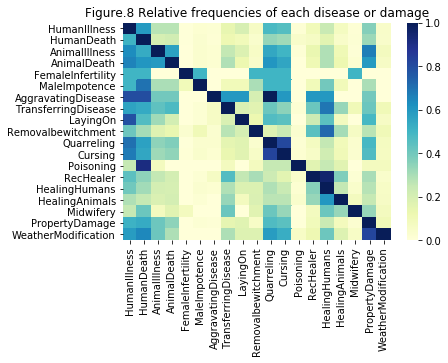

In [116]:
# the seanborn.heatmap cannot handle none, so fill the none first.
diseaseOrDamage_RF.fillna(value=np.nan, inplace=True)
chart = sns.heatmap(diseaseOrDamage_RF, cmap="YlGnBu")
chart.set_title("Figure.8 Relative frequencies of each disease or damage")
plt.show()

In [117]:
# change the topic here if you want to explore another theme
# options: 'HumanIllness', 'HumanDeath', 'AnimalIllness', 'AnimalDeath',
#        'FemaleInfertility', 'MaleImpotence', 'AggravatingDisease',
#        'TransferringDisease', 'LayingOn', 'Removalbewitchment', 'Quarreling',
#        'Cursing', 'Poisoning', 'RecHealer'(Accused was a Recognised healer), 'HealingHumans', 'HealingAnimals',
#        'Midwifery', 'PropertyDamage', 'WeatherModification'
topic = "HealingHumans"
threshold = 0.35

relatedTopics = diseaseOrDamage_RF.columns[diseaseOrDamage_RF.loc[topic] > threshold]
print("The cases documenting \""+ topic + "\" are more likely to document:")
string = ""
for name in relatedTopics:
    if(name != topic):
        string += name + ", "
print(string[0:-2] + ".")

The cases documenting "HealingHumans" are more likely to document:
HumanIllness, RecHealer.


In [118]:
# wrap it to a function
def explore_diseaseOrDamage(topic, threshold):
    relatedTopics = diseaseOrDamage_RF.columns[diseaseOrDamage_RF.loc[topic] > threshold]
    string = "The cases documenting \""+ topic + "\" are more likely to document: "
    for name in relatedTopics:
        if(name != topic):
            string += name + ", "
    string = string[0:-2] + "."
    return(string)

In [161]:
explore_diseaseOrDamage("HumanIllness", 0.35)

'The cases documenting "HumanIllness" are more likely to document:HumanDeath, Quarreling, Cursing, PropertyDamage.'


The cases documenting `HumanIllness` are more likely to document `HumanDeath`, `Quarreling`, `Cursing` and `PropertyDamage`, which makes sense because all these characterisations refer to situations dealing with human. Imagine a conflict begin with a quarreling, leading to propertydamage, cursing and end with humanillness or humandeath.

Note that values of the following deseases and damages are not reliable considering these cases are so few:

In [156]:
DDNumbers = np.sum(diseaseOrDamage)
DDNumbers[DDNumbers < 10]

FemaleInfertility     2
AggravatingDisease    5
dtype: int64